In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

%matplotlib inline


In [6]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
target = 'MedHouseVal'

print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Shape: (20640, 9)
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [7]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Duplicate rows: 0
Shape after dropping duplicates: (20640, 9)


In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target in num_cols:
    num_cols.remove(target)

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nNumeric columns ({len(num_cols)}): {num_cols}")
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")



Numeric columns (8): ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Categorical columns (0): []


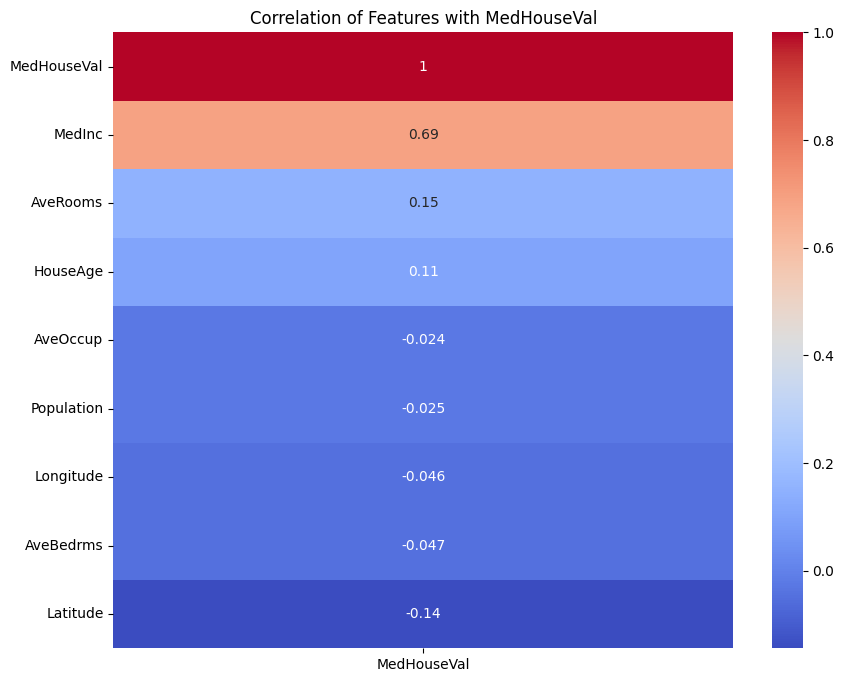

In [9]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title(f"Correlation of Features with {target}")
plt.show()


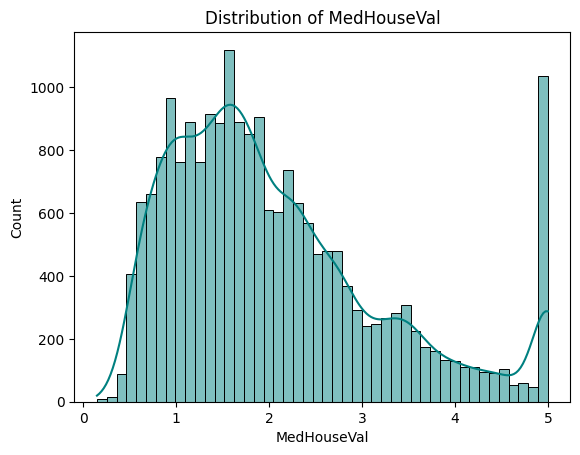

In [10]:
sns.histplot(df[target], kde=True, color="teal")
plt.title(f"Distribution of {target}")
plt.show()


In [11]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (14448, 8), Test shape: (6192, 8)


Linear Regression - Train R2: 0.6093 | Test R2: 0.5958 | MSE: 0.5306


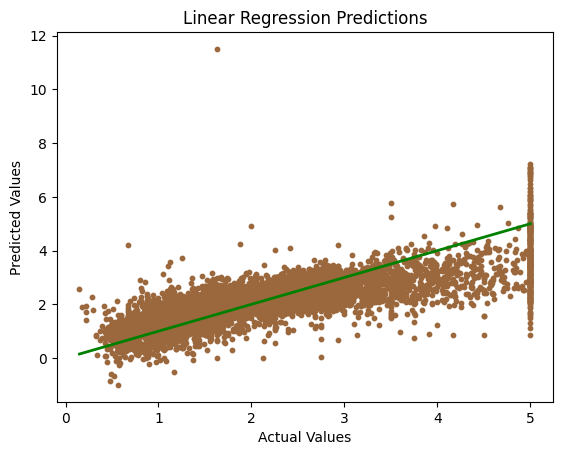

Random Forest - Train R2: 0.9724 | Test R2: 0.8046 | MSE: 0.2565


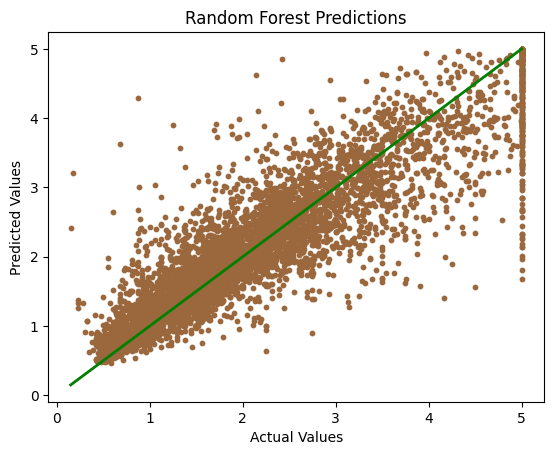

Gradient Boost - Train R2: 0.8062 | Test R2: 0.7803 | MSE: 0.2884


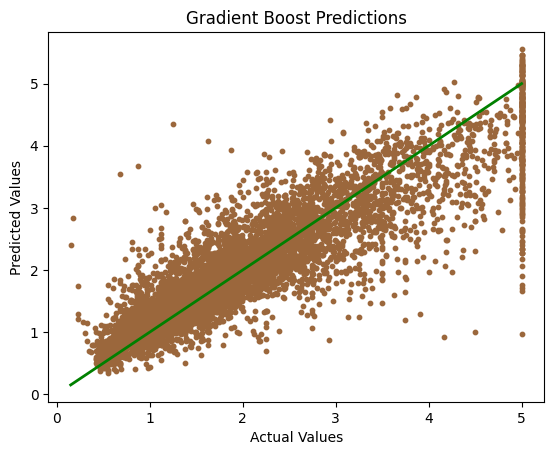

XGBoost - Train R2: 0.9503 | Test R2: 0.8386 | MSE: 0.2118


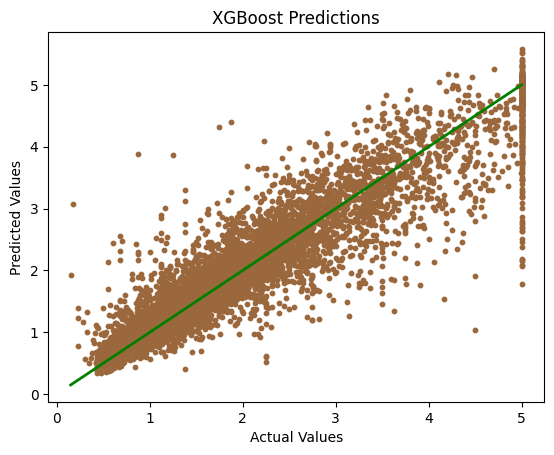

KNN - Train R2: 0.4411 | Test R2: 0.1338 | MSE: 1.1369


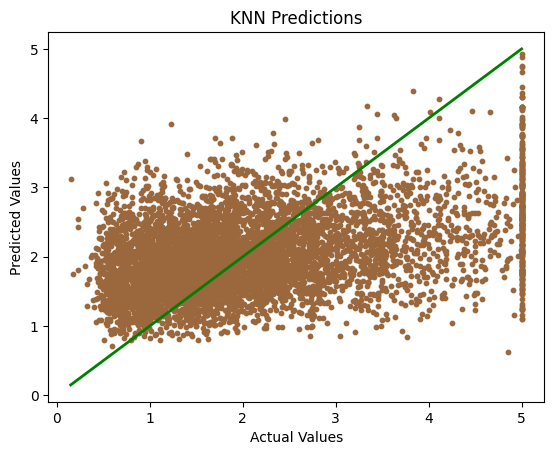

Decision Tree - Train R2: 1.0000 | Test R2: 0.5977 | MSE: 0.5280


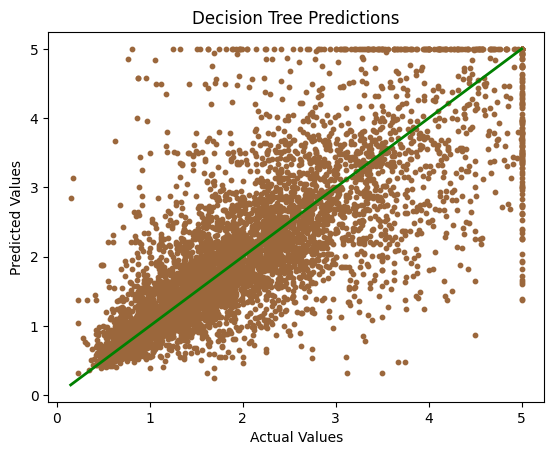

Bagging Regressor - Train R2: 0.9730 | Test R2: 0.8059 | MSE: 0.2547


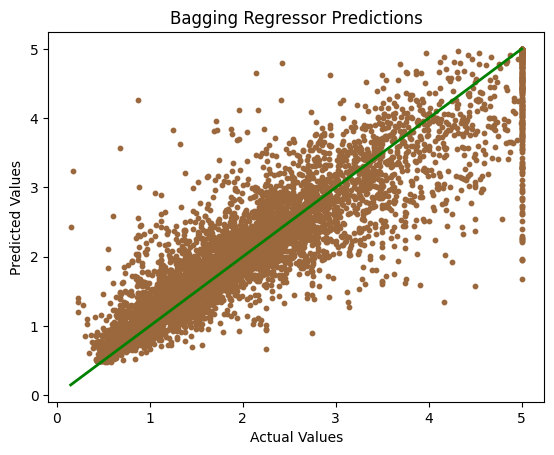

In [12]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42, eval_metric='rmse')),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, test_r2, mse, r2))

    print(f"{name} - Train R2: {model.score(X_train, y_train):.4f} | Test R2: {test_r2:.4f} | MSE: {mse:.4f}")

    plt.scatter(y_test, y_pred, s=10, color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=2)
    plt.show()

In [13]:
results_df = pd.DataFrame(results, columns=['Model', 'Test R2', 'MSE', 'R2 Score'])
results_df = results_df.sort_values(by='Test R2', ascending=False)
display(results_df.style.highlight_max(subset=['Test R2','R2 Score'], color='lightgreen')
        .highlight_min(subset=['MSE'], color='lightgreen'))

,Model,Test R2,MSE,R2 Score
3,XGBoost,0.838616,0.211823,0.838616
6,Bagging Regressor,0.805915,0.254744,0.805915
1,Random Forest,0.804573,0.256505,0.804573
2,Gradient Boost,0.780301,0.288363,0.780301
5,Decision Tree,0.597719,0.528010,0.597719
0,Linear Regression,0.595770,0.530568,0.595770
4,KNN,0.133785,1.136942,0.133785
